<a href="https://colab.research.google.com/github/ravi-gopalan/DAND_Data_Wrangling/blob/master/scrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (78.0.3904.70-0ubuntu0.18.04.2).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
cp: '/usr/lib/chromium-browser/chromedriver' and '/usr/bin/chromedriver' are the same file


In [0]:
from bs4 import BeautifulSoup
from selenium import webdriver

In [0]:
#set options to be headless
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('–headless')
options.add_argument('–no-sandbox')
options.add_argument('–disable-dev-shm-usage')

In [16]:
# open it, go to a website, and get results
driver = webdriver.Chrome('chromedriver',options=options)
driver.get('www.google.com')
print(driver.page_source) # results

WebDriverException: ignored

In [12]:

driver = webdriver.Chrome('/usr/lib/chromium-browser/chromedriver',chrome_options=options)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


WebDriverException: ignored

'window.WIZ_global_data = {"DpimGf":false,"EP1ykd":["/_/*"],"FdrFJe":"-8358242695600770461","GWsdKe":"en-US","Im6cmf":"/_/PlayStoreUi","LVIXXb":1,"LoQv7e":false,"MT7f9b":["Fho1U","Ngbm"],"QEwZ9c":"%.@.[10,[10,50]\\n]\\n,true,null,[96,27,4,8,57,30,110,79,11,16,49,1,3,9,12,104,55,56,51,10,34,77]\\n]\\n","QrtxK":"","S06Grb":"","S1NZmd":false,"Yllh3e":"%.@.1573100588613768,171324239,168811722]\\n","c7nB8c":false,"cfb2h":"boq_playuiserver_20191105.01_p0","eNnkwf":"1573100588","eptZe":"/_/PlayStoreUi/","fPDxwd":[1763433,1772880],"gGcLoe":false,"nQyAE":{"Mutdpf":"false","WuTPob":"true","Zrxxhe":"false","Zy7HEe":"false","aMhTab":"false","dReiAb":"false","FruO9e":"true","KgdN3d":"https://families.google.com","vRf5jd":"false","AQjP6b":"false","agT1sd":"false","tLoQze":"true","WgU7sd":"false","KHpdpf":"false","FClRW":"false","B3n0Re":"false","wcLcde":"false","tBSlob":"false","Go238":"true","PQLgYe":"https://tokenized.play.google.com","AUkF5c":"UA-19995903-1","Mrhm1c":"https://play.google.com","Mh
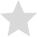
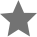
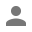
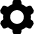
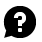
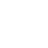
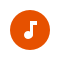
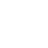
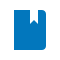
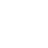
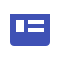
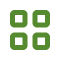
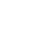
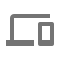
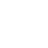
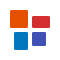
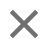
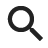
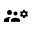
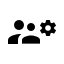
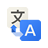
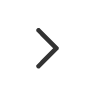
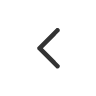
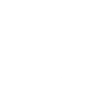
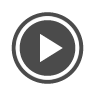
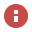
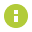
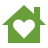
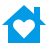
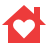
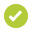
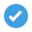
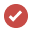
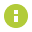
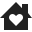
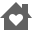

In [0]:
s1 = BeautifulSoup("""<div class="systemRequirementsMainBox">
<div class="systemRequirementsRamContent">
<span title="000 Plus Minimum RAM Requirement">1 GB</span> </div>""", "xml")

print(soup.select_one("span[title*=RAM]").text)

<!DOCTYPE doctype html>
<html dir="ltr" lang="en">
 <head>
  <base href="https://play.google.com/"/>
  <meta content="origin" name="referrer"/>
  <link href="/opensearch.xml" rel="search" title="Google Play" type="application/opensearchdescription+xml"/>
  <link href="//www.gstatic.com/android/market_images/web/favicon_v2.ico" rel="shortcut icon"/>
  <script data-id="_gd" nonce="yfsR5Nay092Xs1KU8mGq3w">
   window.WIZ_global_data = {"DpimGf":false,"EP1ykd":["/_/*"],"FdrFJe":"-7776504427016147782","GWsdKe":"en-US","Im6cmf":"/_/PlayStoreUi","LVIXXb":1,"LoQv7e":false,"MT7f9b":["Fho1U","Ngbm"],"QEwZ9c":"%.@.[10,[10,50]\n]\n,true,null,[96,27,4,8,57,30,110,79,11,16,49,1,3,9,12,104,55,56,51,10,34,77]\n]\n","QrtxK":"","S06Grb":"","S1NZmd":false,"Yllh3e":"%.@.1573115802746888,58968175,4245124119]\n","c7nB8c":false,"cfb2h":"boq_playuiserver_20191105.01_p0","eNnkwf":"1573115802","eptZe":"/_/PlayStoreUi/","fPDxwd":[1763433,1772879],"gGcLoe":false,"nQyAE":{"Mutdpf":"false","WuTPob":"true","Zrxxhe":"
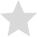
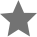
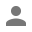
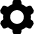
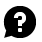
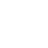
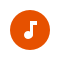
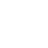
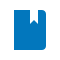
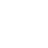
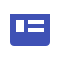
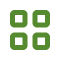
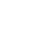
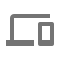
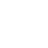
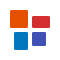
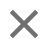
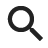
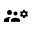
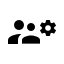
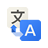
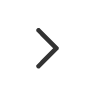
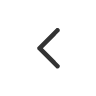
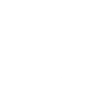
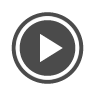
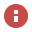
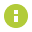
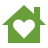
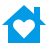
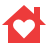
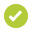
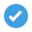
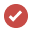
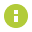
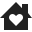
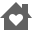

In [0]:
import requests 

  
URL = "https://play.google.com/store/apps/details?id=com.abvmobile&showAllReviews=true"
r = requests.get(URL) 
  
soup = BeautifulSoup(r.content,'html.parser')
#soup = BeautifulSoup(r.content,'lxml')
print(soup.prettify())

In [0]:
soup.find_all('a')

[<a class="gb1" href="https://www.google.com/webhp?tab=8w" target="_blank">Search</a>,
 <a class="gb1" href="http://www.google.com/imghp?hl=en&amp;tab=8i" target="_blank">Images</a>,
 <a class="gb1" href="https://maps.google.com/maps?hl=en&amp;tab=8l" target="_blank">Maps</a>,
 <a class="gb1" href="https://www.youtube.com/?gl=US&amp;tab=81" target="_blank">YouTube</a>,
 <a class="gb1" href="https://news.google.com/nwshp?hl=en&amp;tab=8n" target="_blank">News</a>,
 <a class="gb1" href="https://mail.google.com/mail/?tab=8m" target="_blank">Gmail</a>,
 <a class="gb1" href="https://drive.google.com/?tab=8o" target="_blank">Drive</a>,
 <a class="gb1" href="https://www.google.com/intl/en/about/products?tab=8h" style="text-decoration:none" target="_blank"><u>More</u> »</a>,
 <a class="gb4" href="https://accounts.google.com/ServiceLogin?passive=1209600&amp;continue=https://play.google.com/store/apps/details?id%3Dcom.abvmobile%26showAllReviews%3Dtrue&amp;followup=https://play.google.com/store/a

In [0]:
count = 0
for item in soup.find_all('div'):
  count +=1
  print(item)
print(count)

<div class="QKtxw" id="fcxH9b" jsmodel="jnH8Sb"><c-wiz data-legacy-base-path-prefix="https://play.google.com" data-node-index="4;0" data-p="%.@.]
" jsaction="rcuQ6b:npT2md; submit:GNwXB; input:w2SLu;Dl5S0c:XUhII;" jscontroller="mqk2rb" jsdata="deferred-i1" jsmodel="hc6Ubd HBRW5b" jsname="OEs3Cf" jsrenderer="rGsFle" jsshadow=""><div><div id="gbar"><nobr><a class="gb1" href="https://www.google.com/webhp?tab=8w" target="_blank">Search</a> <a class="gb1" href="http://www.google.com/imghp?hl=en&amp;tab=8i" target="_blank">Images</a> <a class="gb1" href="https://maps.google.com/maps?hl=en&amp;tab=8l" target="_blank">Maps</a> <b class="gb1">Play</b> <a class="gb1" href="https://www.youtube.com/?gl=US&amp;tab=81" target="_blank">YouTube</a> <a class="gb1" href="https://news.google.com/nwshp?hl=en&amp;tab=8n" target="_blank">News</a> <a class="gb1" href="https://mail.google.com/mail/?tab=8m" target="_blank">Gmail</a> <a class="gb1" href="https://drive.google.com/?tab=8o" target="_blank">Drive</

In [0]:
soup.find_all('span', attrs={'jscontroller':"SttZte"})

[<span jsaction="rcuQ6b:npT2md;" jscontroller="SttZte"><img aria-hidden="true" class="T75of QNCnCf" data-ils="3" data-src="https://lh3.googleusercontent.com/zyF7eVJmnoCt1UgUMMFy5khjliSOxb0468AQ2aP3LanbhYFRS_E0Gcg3Ddny1IIFCQ=s128" data-srcset="https://lh3.googleusercontent.com/zyF7eVJmnoCt1UgUMMFy5khjliSOxb0468AQ2aP3LanbhYFRS_E0Gcg3Ddny1IIFCQ=s256 2x" jsaction="rcuQ6b:trigger.M8vzZb;" style="max-height: 128px;max-width: 128px;height: 128px"/></span>,
 <span jsaction="rcuQ6b:npT2md;" jscontroller="SttZte"><img aria-hidden="true" class="T75of QNCnCf" data-ils="3" data-src="https://lh3.googleusercontent.com/zyF7eVJmnoCt1UgUMMFy5khjliSOxb0468AQ2aP3LanbhYFRS_E0Gcg3Ddny1IIFCQ=s128" data-srcset="https://lh3.googleusercontent.com/zyF7eVJmnoCt1UgUMMFy5khjliSOxb0468AQ2aP3LanbhYFRS_E0Gcg3Ddny1IIFCQ=s256 2x" jsaction="rcuQ6b:trigger.M8vzZb;" style="max-height: 128px;max-width: 128px;height: 128px"/></span>,
 <span jsaction="rcuQ6b:npT2md;" jscontroller="SttZte"><img aria-hidden="true" class="T75of 

In [0]:
soup.find_all('div', attrs={'class':"W4P4ne "})

[<div class="W4P4ne "><div class="wSaTQd"><h2 class="Rm6Gwb">Reviews</h2><a class="X1PzMe" href="https://play.google.com/about/comment-posting-policy.html?hl=en-US" target="_blank"><span class="kq6fXc"></span><span class="lSXt5d">Review Policy</span></a></div><div class="Fx1lse"><div class="EmVfjc qs41qe" data-active="true" data-loadingmessage="Loading..." jsaction="animationend:kWijWc;dyRcpb:dyRcpb" jscontroller="qAKInc"><div aria-live="assertive" class="Cg7hO" jsname="vyyg5">Loading...</div><div class="xu46lf" jsname="Hxlbvc"><div class="ir3uv uWlRce co39ub"><div class="xq3j6 ERcjC"><div class="X6jHbb GOJTSe"></div></div><div class="HBnAAc"><div class="X6jHbb GOJTSe"></div></div><div class="xq3j6 dj3yTd"><div class="X6jHbb GOJTSe"></div></div></div><div class="ir3uv GFoASc Cn087"><div class="xq3j6 ERcjC"><div class="X6jHbb GOJTSe"></div></div><div class="HBnAAc"><div class="X6jHbb GOJTSe"></div></div><div class="xq3j6 dj3yTd"><div class="X6jHbb GOJTSe"></div></div></div><div class="i

In [0]:
soup.find_all('span', class_ ='p2TkOb')

[]

In [0]:
soup.find_all('div', attrs={'class':'W4P4ne '})



[<div class="W4P4ne "><div class="wSaTQd"><h2 class="Rm6Gwb">Reviews</h2><a class="X1PzMe" href="https://play.google.com/about/comment-posting-policy.html?hl=en-US" target="_blank"><span class="kq6fXc"></span><span class="lSXt5d">Review Policy</span></a></div><div class="Fx1lse"><div class="EmVfjc qs41qe" data-active="true" data-loadingmessage="Loading..." jsaction="animationend:kWijWc;dyRcpb:dyRcpb" jscontroller="qAKInc"><div aria-live="assertive" class="Cg7hO" jsname="vyyg5">Loading...</div><div class="xu46lf" jsname="Hxlbvc"><div class="ir3uv uWlRce co39ub"><div class="xq3j6 ERcjC"><div class="X6jHbb GOJTSe"></div></div><div class="HBnAAc"><div class="X6jHbb GOJTSe"></div></div><div class="xq3j6 dj3yTd"><div class="X6jHbb GOJTSe"></div></div></div><div class="ir3uv GFoASc Cn087"><div class="xq3j6 ERcjC"><div class="X6jHbb GOJTSe"></div></div><div class="HBnAAc"><div class="X6jHbb GOJTSe"></div></div><div class="xq3j6 dj3yTd"><div class="X6jHbb GOJTSe"></div></div></div><div class="i

In [0]:
soup.find_all('a', class_ = "X1PzMe")

[<a class="X1PzMe" href="https://play.google.com/about/comment-posting-policy.html?hl=en-US" target="_blank"><span class="kq6fXc"></span><span class="lSXt5d">Review Policy</span></a>]

In [0]:
soup.find_all('div', attrs={'jsname':"fk8dgd"})

[]

In [0]:
soup.select('.single-review')

[]